<a href="https://colab.research.google.com/github/Lab-of-Infinity/Topic-Modeling-on-News-Dataset-using-BertTopic-Transformer/blob/main/Topic_Modeling_on_News_Dataset_using_BertTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ## **Topic Modelling using BERTopic Transformer Model**

**BERTopic is a topic modeling technique that leverages 🤗 transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions**

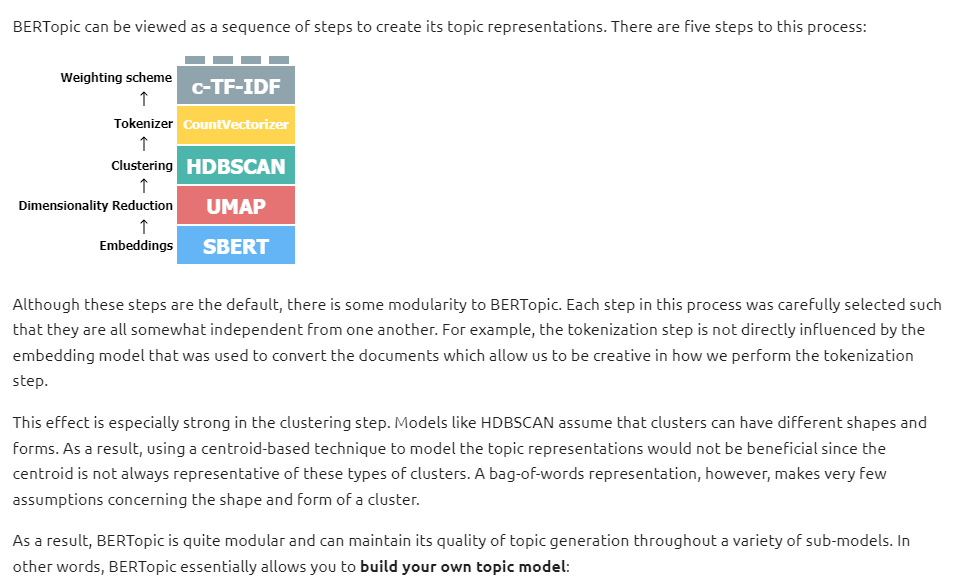

**For More Details on Bertopic check following Links:**
- Visual Overview:  https://maartengr.github.io/BERTopic/algorithm/algorithm.html#visual-overview

- Research Paper : https://arxiv.org/abs/2203.05794

**NOTE**: BERTopic is stocastich which mmeans that the topics might differ across runs. This is mostly due to the stocastisch nature of UMAP.

- **Installation, with sentence-transformers, can be done using pypi:**

          `pip install bertopic`

In [ ]:
# Installation of Bertopic
%pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 95.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### Dataset Information:
**We use the popular scikit learn 20 Newsgroups dataset which contains roughly 18000 news articles. Our objective is to perform topic modelling on this news collection and analyze central theme of data.**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
docs = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers','quotes'))['data']

## **Training for Topic Modeling**

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(language= 'english', calculate_probabilities=True, verbose=True)

In [ ]:
topics,probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2023-01-19 07:47:29,710 - BERTopic - Transformed documents to Embeddings
2023-01-19 07:48:05,414 - BERTopic - Reduced dimensionality
2023-01-19 07:48:48,697 - BERTopic - Clustered reduced embeddings


## **Topic Extraction**
In this section we will extract top frequent topics from dataset

In [ ]:
freq = topic_model.get_topic_info()
freq.head(5)

,Topic,Count,Name
0,-1,6899,-1_to_the_and_of
1,0,1831,0_game_team_games_he
2,1,613,1_key_clipper_chip_encryption
3,2,524,2_ites_cheek_yep_huh
4,3,319,3_israel_israeli_arab_arabs


-1 refers to all outliers and should typically be ignored. It denoted words which do not belong to any cluster

Return top n words for a specific topic and their c-TF-IDF scores

Arguments:
    topic: A specific topic for which you want its representation

Returns:
    The top n words for a specific word and its respective c-TF-IDF scores

Examples:

topic = topic_model.get_topic(12)


In [ ]:
# The top n words for a specific word and its respective c-TF-IDF scores
topic_model.get_topic(0)

[('game', 0.010121551592060072),
 ('team', 0.008823028773556823),
 ('games', 0.007034951187024212),
 ('he', 0.006783400056120909),
 ('players', 0.00619431967105835),
 ('season', 0.006126790578941956),
 ('hockey', 0.006006909924474706),
 ('play', 0.0056609349843868804),
 ('25', 0.005515571194246626),
 ('year', 0.005484214084758915)]

## Attributes

There are a number of attributes that you can access after having trained your BERTopic model:


| Attribute | Description |
|------------------------|---------------------------------------------------------------------------------------------|
| topics_               | The topics that are generated for each document after training or updating the topic model. |
| probabilities_ | The probabilities that are generated for each document if HDBSCAN is used. |
| topic_sizes_           | The size of each topic                                                                      |
| topic_mapper_          | A class for tracking topics and their mappings anytime they are merged/reduced.             |
| topic_representations_ | The top *n* terms per topic and their respective c-TF-IDF values.                             |
| c_tf_idf_              | The topic-term matrix as calculated through c-TF-IDF.                                       |
| topic_labels_          | The default labels for each topic.                                                          |
| custom_labels_         | Custom labels for each topic as generated through `.set_topic_labels`.                                                               |
| topic_embeddings_      | The embeddings for each topic if `embedding_model` was used.                                                              |
| representative_docs_   | The representative documents for each topic if HDBSCAN is used.                                                |

For example, to access the predicted topics for the first 10 documents, we simply run the following:

In [ ]:
topic_model.topics_[:10]

[0, -1, 47, 28, 107, 223, -1, 0, 0, -1]

## **Visualization of Topic Modelling**
There are several visualization options available in BERTopic, namely the visualization of topics, probabilities and topics over time.

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[200],min_probability=0.015)

## Visualize Topic Hierarchy

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created.

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

## Visualize Terms

We can visualize the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. Insights can be gained from the relative c-TF-IDF scores between and within topics. Moreover, you can easily compare topic representations to each other.

In [ ]:
topic_model.visualize_barchart(top_n_topics=5)

## Visualize Topic Similarity
Having generated topic embeddings, through both c-TF-IDF and embeddings, we can create a similarity matrix by simply applying cosine similarities through those topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

## Visualize Term Score Decline
Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.


In [ ]:
topic_model.visualize_term_rank()

## **Fine Tuning Topic Model**
After having created the topic model, you might not be satisfied with some of the parameters you have chosen. Fortunately, BERTopic allows you to update the topics after they have been created. We Will look Fine Tuning of Bert Topic in project.

